import json
import ast
import os


directory = '../../data/cache/2020-05-12_13-42-02'
master = {}
master['apps'] = []

for file in os.listdir(directory):
    if file.endswith(".txt"):
        cache_file = os.path.join(directory, file)

        with open(cache_file, encoding='utf8') as f:
            for line in f:
                app_details = ast.literal_eval(line)
                master['apps'].append(app_details)

with open(directory+'/steamstore.json','w') as out:
    json.dump(master,out)

In [1]:
import pandas as pd
import json

In [12]:
data_path = '../data/cache/store_steamspy/apps.json'

with open(data_path, 'r', encoding='utf-8') as f:
    raw_data = json.load(f)

app_data = pd.DataFrame(raw_data['apps'])

FileNotFoundError: [Errno 2] No such file or directory: '../data/cache/store_steamspy/apps.json'

## Feature Engineering

already_released y/n
Release date


In [3]:
app_data.drop('supported_languages',axis=1,inplace=True)

In [4]:
app_data.drop('recommendations',axis=1, inplace=True)

In [5]:
def get(element,key):
    try:
        return element[key]
    except:
        return None

In [6]:
app_data['price'] = app_data['price_overview'].apply(lambda x: get(x,'initial'))
app_data.drop('price_overview',axis=1,inplace=True)

In [7]:
app_data['released'] = app_data['release_date'].apply(lambda x: not get(x,'coming_soon'))
app_data['release_date'] = app_data['release_date'].apply(lambda x: get(x, 'date'))


In [8]:
app_data.drop('genres',axis=1,inplace=True)

In [9]:
def get_owners(string):
    bounds = [int(item.replace(',','')) for item in string.split(' .. ')]
    return int((bounds[0]+bounds[1])/2)

In [10]:
app_data['median_owners'] = app_data['owners'].apply(get_owners)

In [11]:
app_data['categories'] = app_data['categories'].apply(lambda x: [{'id': 2, 'description': 'Single-player'}] if x is None else x)

In [12]:
app_data['categories'] = app_data['categories'].apply(lambda tags: [tag['description'] for tag in tags])

In [13]:
app_data.dropna(subset=['languages','developers'],inplace=True)

In [14]:
app_data['price'] = app_data.apply((lambda x: 0 if x['is_free']==True else x['price']), axis=1)

In [15]:
l = list(app_data['developers'])
flat_list = [item for sublist in l for item in sublist]

In [1]:
app_data.head()

NameError: name 'app_data' is not defined

In [17]:
user_data = pd.read_csv('../../data/steam-200k.csv')
user_data.columns = ['user_id','app_name','purchased','hours','0']

In [18]:
user_data.drop('0',axis=1,inplace=True)

In [19]:
user_data = user_data[user_data['purchased']=='play']

In [20]:
user_data.drop('purchased',axis=1,inplace=True)

In [21]:
len(user_data['app_name'].unique())

3600

In [22]:
user_data.head()

user_id                    app_name  hours
0  151603712  The Elder Scrolls V Skyrim  273.0
2  151603712                   Fallout 4   87.0
4  151603712                       Spore   14.9
6  151603712           Fallout New Vegas   12.1
8  151603712               Left 4 Dead 2    8.9

In [23]:
import math

In [24]:
user_data['log_hours'] = user_data['hours'].apply(lambda x: math.log((x+1)))

In [25]:
user_data['hours'].plot(kind='hist')

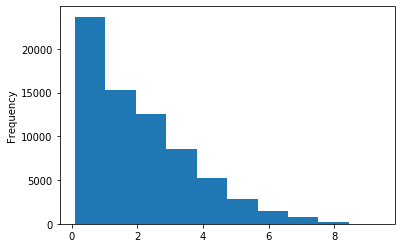

In [26]:
user_data['log_hours'].plot(kind='hist')

In [27]:
l = list(user_data['app_name'].unique())
print(l)

ngs Complete', 'Puzzle Chronicles', 'BattleSpace', 'Adventurer Manager', 'GoD Factory Wingmen', 'A.R.E.S. Extinction Agenda EX', 'Harvest Massive Encounter', 'Servo', 'Void Destroyer', 'Chroma Squad', 'Velvet Assassin', 'Guild Commander', 'Hacker Evolution Duality', 'Swarm Arena', 'Sokobond', 'Ys I', 'Legacy of Kain Soul Reaver', 'Slam Bolt Scrappers', 'Project Snowblind', 'Velocibox', 'PixelJunk Shooter Ultimate', 'The Settlers 7 Paths to a Kingdom', 'Space Hulk Ascension', 'Aion Collectors Edition', 'The Masterplan', 'Blood Bowl Dark Elves Edition', "Tom Clancy's H.A.W.X.", 'Buccaneer The Pursuit of Infamy', 'Age of Conan Rise of the Godslayer', 'Crusaders Thy Kingdom Come', 'Star Ruler', 'Star Wolves 3 Civil War', 'The Old Tree', 'Shadowgate MacVenture Series', 'Legends of Pegasus', 'Silent Hunter 5 Battle of the Atlantic', 'My Lands', 'SC2VN - The eSports Visual Novel', 'The Night of the Rabbit', 'The Jackbox Party Pack 2', 'Gun Metal', 'The Incredible Adventures of Van Helsing III

In [28]:
app_data['name_no_colon'] = app_data['name'].apply(lambda x: x.replace(':',''))

In [29]:
user_apps = pd.merge(user_data,app_data, how='left',left_on='app_name',right_on='name_no_colon')

In [30]:
user_apps.drop(['app_name','platforms','average_forever','average_2weeks','median_forever','median_2weeks','owners','name_no_colon'], axis=1,inplace=True)

In [31]:
user_apps.head()

user_id  hours  log_hours     appid                         name is_free  \
0  151603712  273.0   5.613128   72850.0  The Elder Scrolls V: Skyrim   False   
1  151603712   87.0   4.477337  377160.0                    Fallout 4   False   
2  151603712   14.9   2.766319   17390.0                        Spore   False   
3  151603712   12.1   2.572612   22380.0           Fallout: New Vegas   False   
4  151603712    8.9   2.292535     550.0                Left 4 Dead 2   False   

                 developers  \
0   [Bethesda Game Studios]   
1   [Bethesda Game Studios]   
2                  [Maxis™]   
3  [Obsidian Entertainment]   
4                   [Valve]   

                                          categories  release_date  \
0  [Single-player, Steam Achievements, Steam Trad...  10 Nov, 2011   
1  [Single-player, Steam Achievements, Full contr...   9 Nov, 2015   
2                                    [Single-player]  19 Dec, 2008   
3  [Single-player, Steam Achievements, Partial Co...  21 Oct, 2010   
4  [Single-player, Multi-player, PvP, Online PvP,...  19 Nov, 2009   

            publisher  positive  negative  \
0  Bethesda Softworks  265979.0   15307.0   
1  Bethesda Softworks  150672.0   48110.0   
2     Electronic Arts   21616.0    2426.0   
3  Bethesda Softworks   91268.0    3698.0   
4               Valve  343173.0   10379.0   

                                           languages  \
0  English, French, German, Italian, Spanish - Sp...   
1  English, French, Italian, German, Spanish - Sp...   
2  English, Czech, Danish, German, Spanish - Spai...   
3  English, French, German, Italian, Spanish - Spain   
4  English, Danish, Dutch, Finnish, French, Germa...   

                                                tags   price released  \
0  {'Open World': 9786, 'RPG': 8503, 'Fantasy': 6...   999.0     True   
1  {'Open World': 8427, 'Post-apocalyptic': 7825,...  1999.0     True   
2  {'Simulation': 1163, 'Sandbox': 962, 'Open Wor...  1799.0     True   
3  {'Open World': 3479, 'RPG': 3331, 'Post-apocal...   799.0     True   
4  {'Zombies': 19730, 'Co-op': 10149, 'FPS': 9133...   719.0     True   

   median_owners  
0      7500000.0  
1      7500000.0  
2      3500000.0  
3      3500000.0  
4     35000000.0

In [34]:
app_tags = app_data[['appid','name','tags']]
app_tags = app_tags[app_tags['tags'].apply(lambda x: len(x)>0)]
app_tags['tag_only'] = app_tags['tags'].apply(lambda x: [d.replace(' ','_').lower() for d in x])

In [36]:
app_tags['tag_only'] = app_tags['tags'].apply(lambda x: [d.replace(' ','_').lower() for d in x])

In [2]:
from gensim.models import word2vec
from gensim.models import doc2vec
from gensim.models.doc2vec import TaggedDocument

In [3]:
taglist = list(app_tags['tag_only'])

NameError: name 'app_tags' is not defined

In [40]:
model = word2vec.Word2Vec(taglist, size=1000, window=5, min_count=1, workers=4)

In [41]:
model.wv.most_similar('rpg')

[('mmorpg', 0.6196654438972473),
 ('traditional_roguelike', 0.5923815965652466),
 ('jrpg', 0.5906529426574707),
 ('dungeons_&_dragons', 0.5756229758262634),
 ('dragons', 0.5627028942108154),
 ('dungeon_crawler', 0.5462349653244019),
 ('deckbuilding', 0.542833685874939),
 ('rpgmaker', 0.5389683246612549),
 ('mystery_dungeon', 0.5361659526824951),
 ('card_battler', 0.5184588432312012)]

In [129]:
app_tags['td'] = app_tags.apply(lambda x: TaggedDocument(words=x['tag_only'], tags=[str(x.appid)]),axis=1)

In [130]:
app_tags

appid                          name  \
1      1257190             VR Mini Bowling 2   
2      1257210              Rabbit Simulator   
3      1257270   The Valley of Super Flowers   
5      1257520               Zatorski, Ph.D.   
6      1256520                  Bone Appetit   
...        ...                           ...   
39919   991510               Epic Food Fight   
39920   991530                Choice or Fate   
39921   990720                       Bookend   
39923   990750  RoboSnakes: Core Wars Legacy   
39925   990850              Yanpai Simulator   

                                                    tags  \
1      {'Indie': 31, 'Casual': 31, 'Sports': 31, 'VR'...   
2      {'Casual': 132, 'Simulation': 132, 'Indie': 13...   
3      {'Action': 57, 'Indie': 56, 'Casual': 56, 'Vio...   
5      {'Adventure': 107, 'RPG': 107, 'Indie': 107, '...   
6      {'Action': 56, 'Metroidvania': 12, 'Pixel Grap...   
...                                                  ...   
39919          {'Casual': 43, 'Action': 42, 'Indie': 42}   
39920  {'Adventure': 21, 'RPG': 21, 'Indie': 21, 'RPG...   
39921                                      {'Indie': 22}   
39923  {'Strategy': 31, 'Indie': 31, 'Early Access': ...   
39925  {'Simulation': 36, 'Adventure': 32, 'Action': ...   

                                                tag_only  \
1        [indie, casual, sports, vr, bowling, mini_golf]   
2      [casual, simulation, indie, rpg, action, early...   
3      [action, indie, casual, violent, gore, platfor...   
5            [adventure, rpg, indie, casual, dating_sim]   
6      [action, metroidvania, pixel_graphics, retro, ...   
...                                                  ...   
39919                            [casual, action, indie]   
39920                  [adventure, rpg, indie, rpgmaker]   
39921                                            [indie]   
39923  [strategy, indie, early_access, programming, a...   
39925  [simulation, adventure, action, indie, casual,...   

                                                      td  
1      ([indie, casual, sports, vr, bowling, mini_gol...  
2      ([casual, simulation, indie, rpg, action, earl...  
3      ([action, indie, casual, violent, gore, platfo...  
5      ([adventure, rpg, indie, casual, dating_sim], ...  
6      ([action, metroidvania, pixel_graphics, retro,...  
...                                                  ...  
39919                ([casual, action, indie], [991510])  
39920      ([adventure, rpg, indie, rpgmaker], [991530])  
39921                                ([indie], [990720])  
39923  ([strategy, indie, early_access, programming, ...  
39925  ([simulation, adventure, action, indie, casual...  

[34071 rows x 5 columns]

In [131]:

tagged_documents = list(app_tags['td'])

In [132]:
d2v = doc2vec.Doc2Vec(tagged_documents,window=5,min_count=1,workers=6)

In [136]:
def get_appid(name):
    return str(app_data[app_data['name']==name]['appid'].iloc[0])

In [137]:
get_appid("Cuphead")

'268910'

In [255]:
positives = []
negatives = []
positives.append(d2v.docvecs['32440'])
positives.append(d2v.docvecs['249130'])
# positives.append(d2v.docvecs['7940'])


In [256]:

similarity = d2v.docvecs.most_similar(positive=positives, negative=negatives,topn=34071)
similar_games = pd.DataFrame(similarity,columns=['appid','d2v_similarity'])
similar_games['appid'] = similar_games['appid'].astype(int)

similar_games = similar_games.merge(app_data[['appid','name','positive']], how='left',on='appid')

In [259]:
similar_games

appid  d2v_similarity
0        32440        0.933729
1       249130        0.916285
2       404050        0.915549
3        32450        0.915342
4      1049820        0.907251
...        ...             ...
34065   384840       -0.865542
34066   505330       -0.874605
34067   882040       -0.880036
34068  1094250       -0.881942
34069   938260       -0.910108

[34070 rows x 2 columns]

In [261]:
similar_games['scaled_positives'] = similar_games['positive']+1
similar_games['scaled_positives'] = similar_games['scaled_positives'].apply(math.log)

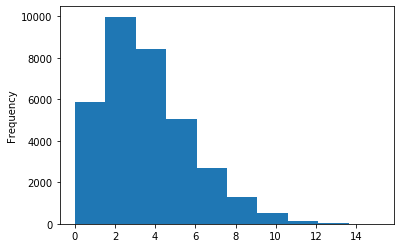

In [262]:
similar_games['scaled_positives'].plot(kind='hist')

In [263]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [264]:
similar_games['scaled_positives'] = scaler.fit_transform(similar_games['scaled_positives'].values.reshape(-1,1))

In [275]:
similar_games['score'] = similar_games['d2v_similarity']+ 0.28*similar_games['scaled_positives']

In [276]:
similar_games.sort_values(by='score',ascending=False).head(20)

appid  d2v_similarity  \
0     32440        0.933729   
1    249130        0.916285   
23   274190        0.882892   
22   207140        0.883147   
12    95400        0.891228   
105  265930        0.841311   
282  252950        0.799906   
339     440        0.789325   
32   275390        0.877480   
17   230270        0.887355   
7    829110        0.899680   
84   386940        0.848346   
3     32450        0.915342   
151  674940        0.824107   
26   725480        0.880733   
43   945360        0.868357   
64   261180        0.855030   
42   604240        0.868783   
45   431930        0.866651   
68   272510        0.853595   

                                                  name  positive  \
0                  LEGO® Star Wars™: The Complete Saga      7796   
1                            LEGO® MARVEL Super Heroes     10361   
23                                            Broforce     36829   
22                                        SpeedRunners     24310   
12                                           ibb & obb      3640   
105                                     Goat Simulator     48595   
282                                      Rocket League    378412   
339                                    Team Fortress 2    624994   
32        Guacamelee! Super Turbo Championship Edition      4399   
17                                                 N++      1958   
7                              LEGO® DC Super-Villains       955   
84                              Ultimate Chicken Horse     14268   
3      LEGO® Indiana Jones™ 2: The Adventure Continues       333   
151                              Stick Fight: The Game     45248   
26                                           Slap City      2074   
43                                            Among Us      3322   
64                                       Lethal League      5485   
42                                     Shotgun Farmers      2426   
45                                            Kabounce      2345   
68   NARUTO SHIPPUDEN: Ultimate Ninja STORM Revolution      4657   

     scaled_positives     score  
0            0.591494  1.099348  
1            0.610266  1.087160  
23           0.693970  1.077204  
22           0.666553  1.069782  
12           0.541234  1.042773  
105          0.712269  1.040746  
282          0.847738  1.037273  
339          0.880856  1.035965  
32           0.553731  1.032525  
17           0.500323  1.027445  
7            0.452969  1.026512  
84           0.631384  1.025133  
3            0.383559  1.022738  
151          0.707559  1.022224  
26           0.504120  1.021887  
43           0.535202  1.018213  
64           0.568291  1.014151  
42           0.514462  1.012832  
45           0.512222  1.010073  
68           0.557492  1.009693

In [274]:
d2v.save('../../models/doc2vec.pickle')

In [15]:
import gensim.models

In [30]:
import pandas as pd
import ast
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
model = gensim.models.Doc2Vec.load('../models/doc2vec.pickle')

In [1]:
import pandas as pd
import ast
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.metrics.pairwise import cosine_similarity

app_list = pd.read_csv('../data/processed/app_data.csv')

# apps = app_list[['appid','name','tags']]
# apps = apps[apps.tags.str.len() != 2]
# apps['tags'] = apps['tags'].apply(ast.literal_eval)

# apps['tags'] = apps['tags'].apply(lambda x: {k.lower().replace(' ','_'):v for k,v in x.items()})
# apps = apps.reset_index().drop('index',axis=1)

# taglist  = list(apps['tags'])

# taglist = [' '.join([(k+' ')*v for k,v in doc.items()]) for doc in taglist]

# tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# # just send in all your docs here
# tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(taglist)

# cosine_sim = cosine_similarity(tfidf_vectorizer_vectors,tfidf_vectorizer_vectors)



# with open('cosine_sim.pickle','wb') as f:
#     pickle.dump(cosine_sim,f,protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
apps = app_list[['appid','name','tags']]
apps = apps[apps.tags.str.len() != 2]
apps['tags'] = apps['tags'].apply(ast.literal_eval)

In [3]:
apps['tags'] = apps['tags'].apply(lambda x: {k.lower().replace(' ','_'):v for k,v in x.items()})

In [4]:
apps = apps.reset_index().drop('index',axis=1)

In [5]:
taglist  = list(apps['tags'])

In [6]:
taglist = [' '.join([(k+' ')*v for k,v in doc.items()]) for doc in taglist]

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(taglist)


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
import sklearn.preprocessing as pp

def cosine_similarities(mat):
    col_normed_mat = pp.normalize(mat.tocsc(), axis=0)
    return col_normed_mat.T * col_normed_mat

In [27]:
tfidf_vectorizer_vectors.T

<433x34071 sparse matrix of type '<class 'numpy.float64'>'
	with 303313 stored elements in Compressed Sparse Column format>

In [56]:
cos = cosine_similarities(tfidf_vectorizer_vectors.T)

In [57]:
np.array(cos[0].todense())[0]

array([1.        , 0.16263262, 0.16094057, ..., 0.19706267, 0.04535605,
       0.12961126])

In [45]:
idx = indices[indices=='Fallout 4'].index[0]

In [52]:
score_series = pd.Series(np.array(cos[idx].todense())[0]).sort_values(ascending = False)

TypeError: 'function' object is not subscriptable

In [47]:
score_series

21726    1.000000
19513    0.916102
19520    0.879562
21858    0.877547
29263    0.838498
           ...   
22064    0.000000
4917     0.000000
8673     0.000000
26088    0.000000
6237     0.000000
Length: 34071, dtype: float64

In [48]:

arr = np.array(apps.name)
recc = []
for i in np.array(score_series.index):
    recc.append(arr[i])

In [49]:
recc[0:11]

['Fallout 4',
 'Fallout 3',
 'Fallout 3 - Game of the Year Edition',
 'Fallout: New Vegas',
 'Metro Exodus',
 'S.T.A.L.K.E.R.: Call of Pripyat',
 'S.T.A.L.K.E.R.: Clear Sky',
 'RAGE',
 'Rage',
 'Fallout 4 VR',
 'S.T.A.L.K.E.R.: Shadow of Chernobyl']

In [55]:
from sklearn.externals import joblib

with open('test.joblib', 'wb') as f:
    joblib.dump(cos,f)

In [51]:
mat = joblib.load('test.joblib')

In [ ]:
mat

In [53]:
score_series = pd.Series(np.array(mat[idx].todense())[0]).sort_values(ascending = False)

arr = np.array(apps.name)
recc = []
for i in np.array(score_series.index):
    recc.append(arr[i])

recc[0:11]

<function __main__.cosine_similarities(mat)>

In [27]:
cosine_sim = cosine_similarity(tfidf_vectorizer_vectors,tfidf_vectorizer_vectors)

In [31]:
np.array(cosine_sim)

array([[1.        , 0.16263262, 0.16094057, ..., 0.19706267, 0.04535605,
        0.12961126],
       [0.16263262, 1.        , 0.3775383 , ..., 0.26456208, 0.0955003 ,
        0.54178887],
       [0.16094057, 0.3775383 , 1.        , ..., 0.26316408, 0.06056998,
        0.53762261],
       ...,
       [0.19706267, 0.26456208, 0.26316408, ..., 1.        , 0.23016052,
        0.21193556],
       [0.04535605, 0.0955003 , 0.06056998, ..., 0.23016052, 1.        ,
        0.0487792 ],
       [0.12961126, 0.54178887, 0.53762261, ..., 0.21193556, 0.0487792 ,
        1.        ]])

In [1]:
import pickle

with open('cosine_sim.pickle','wb') as f:
    pickle.dump(cosine_sim,f,protocol=pickle.HIGHEST_PROTOCOL)

NameError: name 'cosine_sim' is not defined

In [44]:
indices = pd.Series(apps.name)

In [60]:
indices = pd.Series(apps.name)
idx = indices[indices=='Fallout 4'].index[0]
score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
arr = np.array(apps.name)
recc = []
for i in np.array(score_series.index):
    recc.append(arr[i])

In [65]:
score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)


In [74]:
arr = np.array(apps.name)

In [75]:
recc = []
for i in np.array(score_series.index):
    recc.append(arr[i])

In [73]:
np.array(score_series.index)

array([21726, 19513, 19520, ...,  8673, 26088,  6237])

In [70]:
np.array(apps.name)[0]

'VR Mini Bowling 2'

In [68]:
import numpy as np

In [50]:
def recommendations(title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    scored = list(score_series.iloc[1:1000].index)
    # populating the list with the titles of the best 10 matching movies
    for i in scored:
        recommended_movies.append(list(apps.name)[i])

    return recommended_movies

In [9]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 3

# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

# labels = clustering_model.fit_predict(tfidf_vectorizer_vectors)
# print labels

X = tfidf_vectorizer_vectors.todense()

# # ----------------------------------------------------------------------------------------------------------------------

# reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# # print reduced_data

# fig, ax = plt.subplots()
# for index, instance in enumerate(reduced_data):
#     # print instance, index, labels[index]
#     pca_comp_1, pca_comp_2 = reduced_data[index]
#     color = labels_color_map[labels[index]]
#     ax.scatter(pca_comp_1, pca_comp_2, c=color)
# plt.show()



# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()

NameError: name 'Y' is not defined

In [14]:
from sklearn.manifold import TSNE
X = tfidf_vectorizer_vectors.todense()
embeddings = TSNE(n_components=2,perplexity=40)
Y = embeddings.fit_transform(X)

In [23]:
Y = embeddings.fit_transform(X)

In [24]:
import pickle
with open('test_40.pkl','wb') as f:
    pickle.dump(Y,f)

In [25]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(

    go.Scattergl(
        x = Y[:,0],
        y=Y[:,1],
        text=apps.name,
        mode='markers'
    )
)
fig.update_layout(title_text = 'WebGL')

fig.show()

In [35]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(Y)
# print reduced_data


In [36]:
fig = go.Figure()
fig.add_trace(

    go.Scattergl(
        x = reduced_data[:,0],
        y=reduced_data[:,1],
        text=apps.name,
        mode='markers'
    )
)
fig.update_layout(title_text = 'WebGL')

fig.show()

In [56]:
positives = [model['star_wars'],model['lego']]
negatives = []

similarity = model.docvecs.most_similar(positive=positives, negative=negatives,topn=20)
similar_games = pd.DataFrame(similarity,columns=['appid','d2v_similarity'])
similar_games['appid'] = similar_games['appid'].astype(int)

similar_games = similar_games.merge(app_data[['appid','name','positive']], how='left',on='appid')